In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
AttackTypesDF = gtdDF[['index1','attacktype1_txt']]
AttackTypesDF.head()

,index1,attacktype1_txt
0,1.0,Armed Assault
1,2.0,Hostage Taking (Kidnapping)
2,3.0,Armed Assault
3,4.0,Bombing/Explosion
4,5.0,Armed Assault


In [6]:
filterlist = ['Unknown']
AttackTypesFilterDF = AttackTypesDF[~AttackTypesDF['attacktype1_txt'].isin(filterlist)]
AttackTypesFilterDF.head()

,index1,attacktype1_txt
0,1.0,Armed Assault
1,2.0,Hostage Taking (Kidnapping)
2,3.0,Armed Assault
3,4.0,Bombing/Explosion
4,5.0,Armed Assault


In [7]:
AttackTypes2DF = pd.get_dummies(AttackTypesFilterDF)
AttackTypes2DF.head()

,index1,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hijacking,attacktype1_txt_Hostage Taking (Barricade Incident),attacktype1_txt_Hostage Taking (Kidnapping),attacktype1_txt_Unarmed Assault
0,1.0,1,0,0,0,0,0,0,0
1,2.0,0,0,0,0,0,0,1,0
2,3.0,1,0,0,0,0,0,0,0
3,4.0,0,0,1,0,0,0,0,0
4,5.0,1,0,0,0,0,0,0,0


In [8]:
AttackTypesMergeDF = result = pd.merge(AttackTypes2DF,AttackTypesFilterDF[['index1','attacktype1_txt']],on='index1')
AttackTypesMergeDF = AttackTypesMergeDF.rename(columns={
    'attacktype1_txt_Armed Assault':'Armed Assault', 
    'attacktype1_txt_Assassination': 'Assassination',
    'attacktype1_txt_Bombing/Explosion':'Bombing/Explosion',
    'attacktype1_txt_Facility/Infrastructure Attack':'Facility/Infrastructure Attack',
    'attacktype1_txt_Hijacking':'Hijacking',
    'attacktype1_txt_Hostage Taking (Barricade Incident)':'Hostage Taking (Barricade Incident)',
    'attacktype1_txt_Hostage Taking (Kidnapping)':'Hostage Taking (Kidnapping)',
    'attacktype1_txt_Unarmed Assault':'Unarmed Assault',
    })
AttackTypesMergeDF.head()

,index1,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,attacktype1_txt
0,1.0,1,0,0,0,0,0,0,0,Armed Assault
1,2.0,0,0,0,0,0,0,1,0,Hostage Taking (Kidnapping)
2,3.0,1,0,0,0,0,0,0,0,Armed Assault
3,4.0,0,0,1,0,0,0,0,0,Bombing/Explosion
4,5.0,1,0,0,0,0,0,0,0,Armed Assault


In [9]:
# Assign X (data) and y (target)
data = AttackTypesMergeDF.drop(["index1","attacktype1_txt",], axis=1)
target = AttackTypesMergeDF["attacktype1_txt"]
feature_names = data.columns
print(data.shape, target.shape)

(89722, 8) (89722,)


In [10]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [13]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.37190624925300936, 'Bombing/Explosion'),
 (0.32187704342247403, 'Armed Assault'),
 (0.10668483186289716, 'Assassination'),
 (0.09094511982811858, 'Hostage Taking (Kidnapping)'),
 (0.08814722949907265, 'Facility/Infrastructure Attack'),
 (0.010722262912844312, 'Unarmed Assault'),
 (0.005005826986587908, 'Hostage Taking (Barricade Incident)'),
 (0.004711436234995807, 'Hijacking')]

In [14]:
RFAttackTypesDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), 
                               columns = ['Probability', 'Attack Type'])
RFAttackTypesDF
RFAttackTop6DF = RFAttackTypesDF.head(6)
RFAttackTop6DF

,Probability,Attack Type
0,0.371906,Bombing/Explosion
1,0.321877,Armed Assault
2,0.106685,Assassination
3,0.090945,Hostage Taking (Kidnapping)
4,0.088147,Facility/Infrastructure Attack
5,0.010722,Unarmed Assault


In [15]:
pies = RFAttackTop6DF['Attack Type']
pie_slices = RFAttackTop6DF['Probability']
colors = ["lightskyblue","orange","pink","yellowgreen","lightcoral","silver"]
explode = (0.1,0,0,0,0,0)

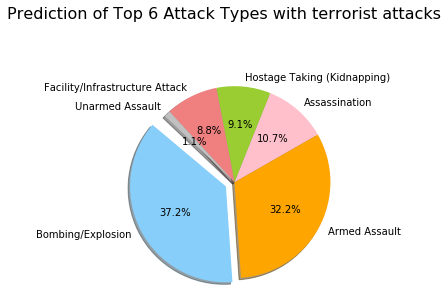

In [16]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML14_AttackType_Attacks_Pie_RF")
plt.suptitle('Prediction of Top 6 Attack Types with terrorist attacks', size=16, y=1.12) 
plt.show()

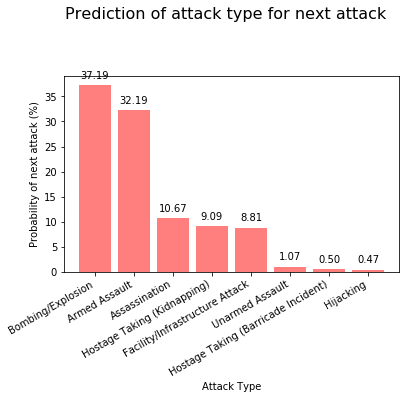

In [17]:
y_axis = RFAttackTypesDF['Probability']*100
x_axis = RFAttackTypesDF['Attack Type']
fig, ax = plt.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
plt.xlabel("Attack Type")
plt.ylabel("Probability of next attack (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML14_AttackType_Attacks_Bar_RF")
# Title for the chart
plt.suptitle('Prediction of attack type for next attack', size=16, y=1.12) 
plt.show()
